<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1903 entries, 2010-01-04 to 2017-07-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1903 non-null   float64
 1   Low        1903 non-null   float64
 2   Open       1903 non-null   float64
 3   Close      1903 non-null   float64
 4   Volume     1903 non-null   float64
 5   Adj Close  1903 non-null   float64
dtypes: float64(6)
memory usage: 104.1 KB


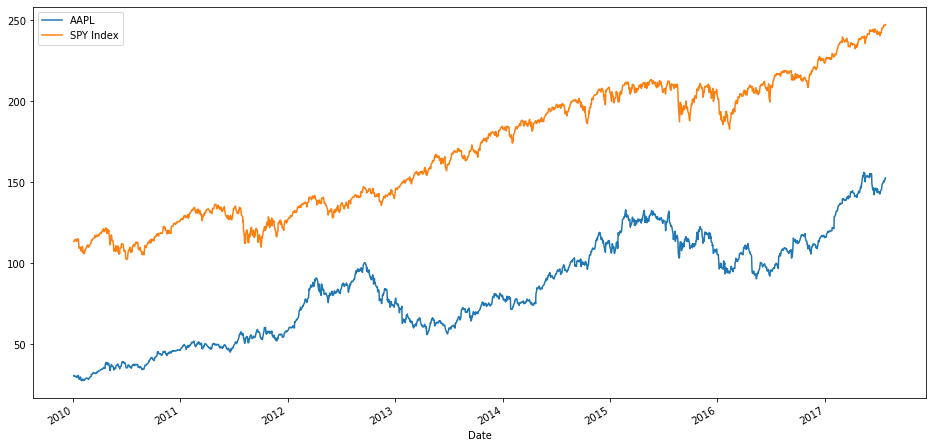

In [16]:


from scipy import stats
import pandas as pd
import pandas_datareader as read


start=pd.to_datetime('2010-01-04')
end=pd.to_datetime('2017-07-25')
 
aapl=read.DataReader('AAPL','yahoo',start,end)
spy_etf=read.DataReader('SPY','yahoo',start,end)
spy_etf.info()
aapl.head()
import matplotlib.pyplot as plt
%matplotlib inline


aapl['Close'].plot(label='AAPL',figsize=(16,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

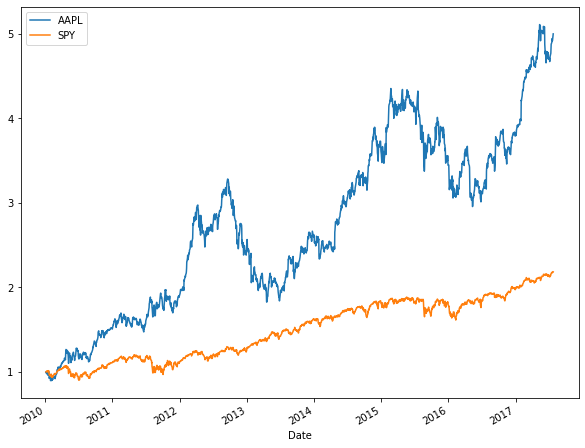

In [17]:
aapl['Cumulative']=aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative']=spy_etf['Close']/spy_etf['Close'].iloc[0]
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()


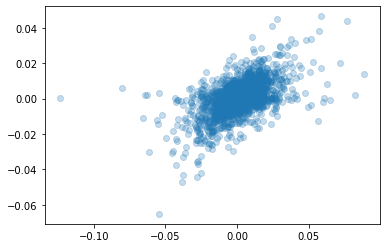

In [18]:
aapl['Daily Return']=aapl['Close'].pct_change(1)
spy_etf['Daily Return']=spy_etf['Close'].pct_change(1)
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.25)




0.9894695045442143


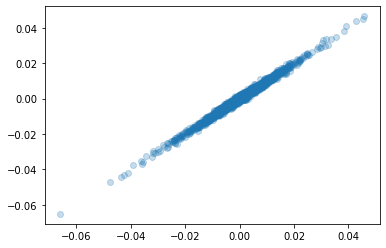

In [23]:
beta,alpha,r_value,p_value,std_err=stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])



import numpy as np
noise=np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

fake_stock=spy_etf['Daily Return'].iloc[1:]+noise
plt.scatter(fake_stock,spy_etf['Daily Return'].iloc[1:],alpha=0.25)

beta,alpha,r_value,p_value,std_err=stats.linregress(fake_stock,spy_etf['Daily Return'].iloc[1:])

print(beta)
